# must_have_텐초의_딥러닝_특강
### 강의 링크: https://www.youtube.com/watch?v=P3rQp1dYK_g&list=PLgD4RfwkG2A4JqDZGx9YFrQhGz9EL2xO1

In [21]:
#필요한 라이브러리 불러오기
import math
import torch
import matplotlib.pyplot as plt

In [22]:
#-pi부터 pi 사이의 점을 1000개 추출
x = torch.linspace(-math.pi, math.pi, 1000)

In [23]:
#실제 사인 곡선에서 추출한 값으로 y 만들기
y = torch.sin(x)

In [24]:
#예측 사인 곡선에 사용할 임의의 가중치(계수)를 뽑아 y 만들기
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

In [25]:
#사인 함수를 근사할 3차 다항식 정의
y_random = a * x**3 + b * x**2 + c * x + d

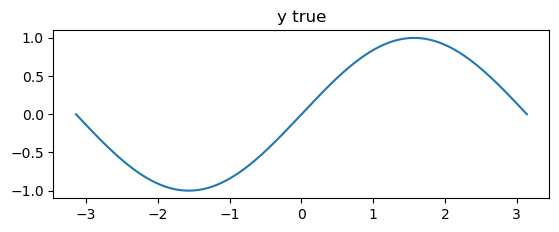

In [26]:
#실제 사인 곡선을 실제 y값으로 만들기
plt.subplot(2,1,1) #2행 1열의 첫번쨰에 그림을 배치한다.
plt.title('y true')
plt.plot(x, y)
#실제 사인 곡선 출력하기
plt.show()

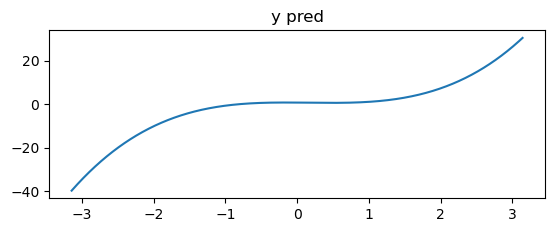

In [27]:
#실제 사인 곡선을 임의의 가중치로 만든 yr값으로 만들기
plt.subplot(2,1,2) #2행 1열의 두번쨰에 그림을 배치한다.
plt.title('y pred')
plt.plot(x, y_random)
#예측 사인 곡선 출력하기
plt.show()

In [28]:
# 학습 루프 구성

# 학습 전후 비교해보기
learning_rate = 1e-6 #학습률 정의: 10의 -6승

#학습 2,000번 진행
for epoch in range(2000):
    y_pred = a * x**3 + b * x**2 + c * x + d

    loss = (y_pred - y).pow(2).sum().item() #손실 정의
    if epoch % 100 == 0:
        print(f'epoch{epoch + 1} loss: {loss}')

    grad_y_pred = 2.0 * (y_pred - y) #기울기의 미분값
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    a -= learning_rate * grad_a #가중치 업데이트
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

epoch1 loss: 169188.109375
epoch101 loss: 998.3777465820312
epoch201 loss: 819.8707885742188
epoch301 loss: 674.170166015625
epoch401 loss: 554.6372680664062
epoch501 loss: 456.549560546875
epoch601 loss: 376.0413818359375
epoch701 loss: 309.9463806152344
epoch801 loss: 255.67132568359375
epoch901 loss: 211.09164428710938
epoch1001 loss: 174.46653747558594
epoch1101 loss: 144.36927795410156
epoch1201 loss: 119.63005828857422
epoch1301 loss: 99.28990173339844
epoch1401 loss: 82.56224822998047
epoch1501 loss: 68.80200958251953
epoch1601 loss: 57.47969055175781
epoch1701 loss: 48.16094207763672
epoch1801 loss: 40.489139556884766
epoch1901 loss: 34.171539306640625


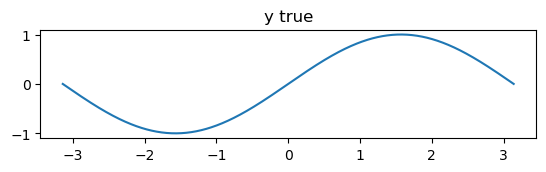

In [29]:
#실제 사인 곡선 그리기
plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)
plt.show()

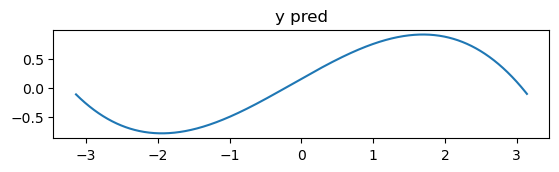

In [30]:
#예측한 가중치의 사인 곡선을 그리기
plt.subplot(3,1,2)
plt.title("y pred")
plt.plot(x, y_pred)
plt.show()

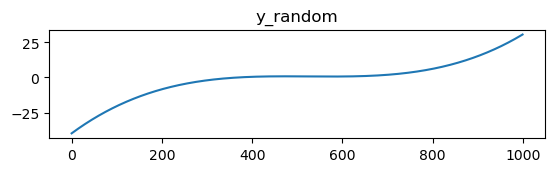

In [31]:
#랜덤한 가중치의 사인 곡선 그리기
plt.subplot(3,1,3)
plt.plot(y_random)
plt.title("y_random")
plt.show()

## 캘리포니아 집값 예측하기

In [32]:
#학습 루프
#1. 모델 정의
#2. 데이터 불러오기
#3. 손실 계산
#4. 오차 역전파 및 최적화
#5. 원하는 만큼 반복 -> 예: 학습종료, 아니오: 데이터 불러오기

In [45]:
#라이브러리 임포트
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [46]:
dataset = fetch_california_housing()
dataFrame = pd.DataFrame(dataset['data']) #데이터셋의 데이터 불러오기
dataFrame.columns = dataset["feature_names"] #특징의 이름 불러오기
dataFrame['target'] = dataset['target'] #데이터프레임에 정답 추가

print(dataFrame.head()) #데이터프레임을 요약해서 출력

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [47]:
#데이터프레임 정보 확인
print(dataFrame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [48]:
#선형회귀 MLP 모델을 이용한 집값 예측

#라이브러리 import
import torch
import torch.nn as nn
from torch.optim.adam import Adam #최적화를 위한 Adam 최적화, Adam: 기울기 + 모멘트 + 관성이 더해진 최적화 기법

In [37]:
#모델 정의
model = nn.Sequential( #Sequential: 안에 들어있는 신경망을 차곡차곡 쌓아라
    nn.Linear(8, 100), #MLP(입력의 개수, 출력의 개수)
    nn.ReLU(), #활성화 함수의 일종 ReLU: 0보다 작은 값은 0이고, 그보다 크면 자기 자신의 값을 가짐
    nn.Linear(100,1) #앞에서 출력받은 100개를 그대로 입력하고, 집값을 의미하는 1개의 출력을 뱉어냄
)

In [38]:
#학습루프 구성
X = dataFrame.iloc[:, :8].values #8번째 값은 target값이 되기 때문에, 0에서 7번째 값들만 불러와라
Y = dataFrame['target'].values #taget값을 불러와라

batch_size = 100 #batch_size: 한 번에 모델에 넣어주는 모델의 개수  
learning_rate = 0.001 #학습률:0.001로 지정

#가중치를 수정하는 최적화 함수 정의
optim = Adam(model.parameters(), lr=learning_rate) #Adam을 이용하여 최적화를 지정하는데, model의 파라미터를 넣어주고 학습률을 지정.

In [39]:
#에포크 반복
for epoch in range(200): #에포크 200번 지정

    #배치 반복
    for i in range(len(X)//batch_size): #전체 데이터의 개수를 batch_size로 나눔
        start = i*batch_size
        end = start + batch_size

In [40]:
#파이토치 실수형 텐서로 변환
x = torch.FloatTensor(X[start:end])
y = torch.FloatTensor(Y[start:end])

optim.zero_grad() #가중치의 기울기를 0으로 초기화
preds = model(x) #모델의 예측값 계산
loss = nn.MSELoss()(preds, y) #MSE 손실 계산
loss.backward() #오차 역전파
optim.step() #최적화 진행

/opt/anaconda3/envs/DL_learn/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [41]:
if epoch % 20 == 0:
    print(f"epoch{epoch} loss: {loss.item()}")

In [ ]:
#배치(batch): 딥러닝 모델의 가중치를 업데이트 시킬 때 사용되는 데이터의 묶음 단위
#에포크(epoch): 배치 크기 단위로 전체 데이터 모드를 학습하는 단위
#이터레이션(iteration): 에포크를 완성시키는 데 필요한 배치의 반복 횟수

In [44]:
#모델 성능 평가하기
prediction = model(torch.FloatTensor(X[0, :13]))
real = Y[0]
print(f"prediction: {[prediction.item()]} real: {real}")

prediction: [-31.92466926574707] real: 4.526


### 손글씨 분류하기: 다중분류

In [49]:
#회귀: 값을 직접 예측
#분류: 어느 범주에 해당하는 지를 예측

In [50]:
#라이브러리 임포트
import matplotlib.pyplot as plt
from torchvision.datasets.mnist import MNIST #MNIST데이터셋 블러오기
from torchvision.transforms import ToTensor #이미지를 파이토치의 텐서로 바꿔주는 함수

In [51]:
#학습용 데이터와 평가용 데이터 분리
training_data = MNIST(root='./data', train=True, download=True, transform=ToTensor())
test_data = MNIST(root='./data', train=False, download=True, transform=ToTensor())

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.10MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 150kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.55MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.63MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [52]:
print(len(training_data)) #학습에 사용할 데이터 개수
print(len(test_data)) #평가에 사용할 데이터 개수 


60000
10000


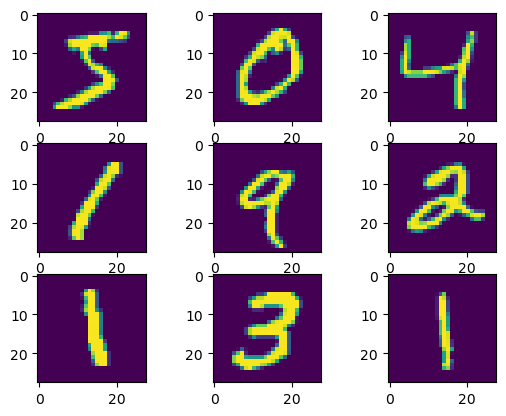

In [54]:
for i in range(9): #샘플 이미지 9개 출력
    plt.subplot(3, 3, i+1)
    plt.imshow(training_data.data[i])
plt.show()

In [ ]:
#학습용 데이터와 평가용 데이터의 데이터로더 정의
from torch.utils.data.dataloader import DataLoader
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

In [56]:
#평가용 데이터는 섞을 필요가 없음
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [58]:
#손글씨 분류 모델 학습하기

#라이브러리 임포트
import torch #파이토치
import torch.nn as nn #신경망
from torch.optim.adam import Adam #adam 최적화

In [61]:
#학습에 사용할 프로세서 지정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"학습에 사용할 디바이스는 {device} 입니다.")

학습에 사용할 디바이스는 cpu 입니다.


In [ ]:
model = nn.Sequential(
    nn.Linear(784, 64), #784인 이유: 데이터가 28x28x1이기 떄문(흑백 이미지라서 채널이 1) -> 784개의 입력을 받고 64개의 출력
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,10) #0~9까지의 범주를 가지고 있기 떄문에, 마지막 출력은 10
)
model.to(device) #모델의 파라미터를 cpu로 보냄

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
lr = 1e-3 #학습률을 10의 -3승 ->0.001
optim = Adam(model.parameters(), lr=lr)

for epoch in range(20):
    for data, label in train_loader:
        optim.zero_grad()
        #입력 데이터 모양을 모델의 입력에 맞게 변환
        data = torch.reshape(data, (-1, 784)).to(device)
        preds = model(data)

        loss = nn.CrossEntropyLoss()(preds, label.to(device)) #손실 계산
        loss.backward() #오차 역전파
        optim.step() #최적화 진행

    print(f'epoch{epoch + 1} loss: {loss.item()}')

#모델을 MNIST.pth라는 이름으로 저장
torch.save(model.state_dict(), 'MNIST.pth')

epoch1 loss: 0.23896853625774384
epoch2 loss: 0.019675791263580322
epoch3 loss: 0.17511318624019623
epoch4 loss: 0.08497297018766403
epoch5 loss: 0.1921616494655609
epoch6 loss: 0.019155550748109818
epoch7 loss: 0.003024107776582241
epoch8 loss: 0.037932269275188446
epoch9 loss: 0.020616237074136734
epoch10 loss: 0.0007459758198820055
epoch11 loss: 0.0041886367835104465
epoch12 loss: 0.0005642343312501907
epoch13 loss: 0.000929263886064291
epoch14 loss: 4.6288616431411356e-05
epoch15 loss: 0.003452637465670705
epoch16 loss: 0.00037639131187461317
epoch17 loss: 0.0015648901462554932
epoch18 loss: 0.02126597799360752
epoch19 loss: 0.0001422409841325134
epoch20 loss: 0.004361949861049652


In [68]:
#모델 성능 평가하기

#모델 가중치 불러오기
model.load_state_dict(torch.load("MNIST.pth", map_location=device))

num_corr = 0 #분류에 성공한 전체 개수

with torch.no_grad(): #기울기를 계산하지 않음
    for data, label in test_loader:
        data = torch.reshape(data, (-1,784)).to(device)

        output = model(data.to(device))
        preds = output.data.max(1)[1] #모델의 예측값 계산

        #올바르게 분류한 개수
        corr = preds.eq(label.to(device).data).sum().item()
        num_corr += corr

    print(f'Accuracy: {num_corr/len(test_data)}') #분류 정확도 출력

/var/folders/hx/68vgjxsx1fz3b23kg7xk3njh0000gn/T/ipykernel_7106/572688436.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("MNIST.pth", m

Accuracy: 0.9758
